In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
df=pd.read_csv("C:/Users/dyaam/Desktop/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

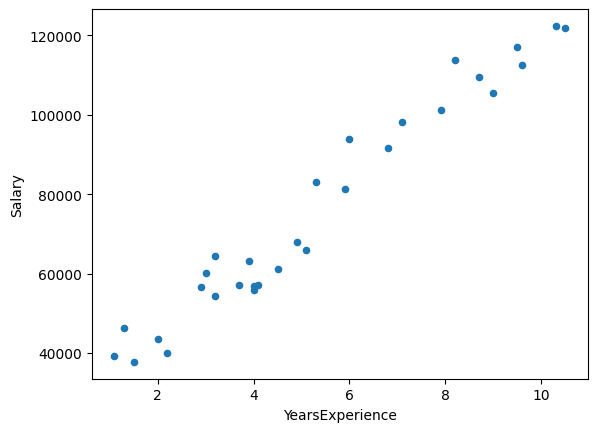

In [115]:
df.plot.scatter(x="YearsExperience",y="Salary")

In [116]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [117]:
x_train=df["YearsExperience"].values.reshape(-1,1)
y_train=df["Salary"].values.reshape(-1,1)
model.fit(x_train,y_train)


LinearRegression()

In [118]:
# in order to get the int

w=model.coef_[0][0]
b=model.intercept_[0]

# the straight line

x=np.linspace(1,10,100)
y=w*x +b


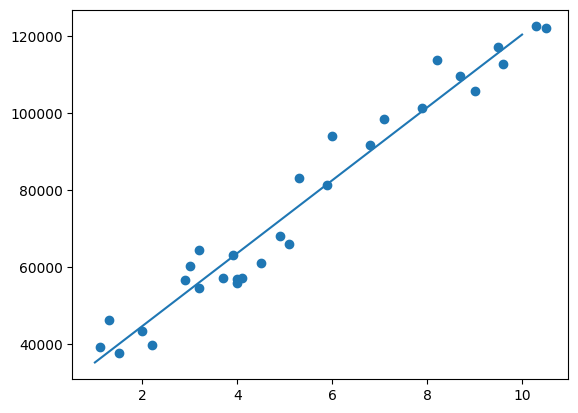

In [119]:
# plotting the straight line the training points
plt.figure()
plt.scatter(x_train,y_train)
plt.plot(x,y)
plt.show()

In [120]:
#calculating sigma for the gaussian distribution 
dist = w*x_train +b   -    y_train   # distance form the straight line
sigma = np.sum(dist**2)
sigma = sigma / x_train.shape[0]
sigma = np.sqrt(sigma)



In [121]:
# computing probabilities in gausssian distribution
prob = np.exp(-0.5*(dist/sigma)**2) / (sigma*np.sqrt(2*np.pi))
np.sum(prob<8e-06)

0

In [123]:
# Adding anomaly points
x_train=np.append(x_train,[2,5,8,10])
y_train=np.append(y_train,[100000,120000,60000,70000])

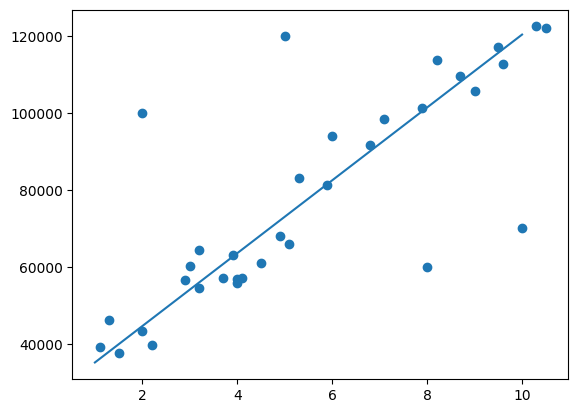

In [124]:
# plotting data with added anomalies
plt.figure()
plt.scatter(x_train,y_train)
plt.plot(x,y)
plt.show()

In [125]:
dist = w*x_train +b   -    y_train   # distance form the straight line
# computing probabilities in gausssian distribution 
prob = np.exp(-0.5*(dist/sigma)**2) / (sigma*np.sqrt(2*np.pi))


In [126]:
epsilon  = 8e-06    #the threshold
anomalies = prob < epsilon

color_array = np.where(prob < epsilon,"#ff0000","#00ff00")


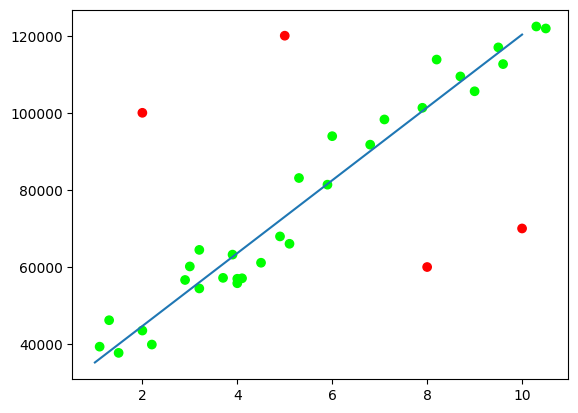

In [127]:
plt.figure()
plt.scatter(x_train,y_train,c=color_array)
plt.plot(x,y)
plt.show()